In [1]:
import pandas as pd
from datetime import datetime
df_train = pd.read_csv(r'C:\Users\pc\Desktop\Ola Bike Ride Request Forecast\test.csv', dtype = 'str')
df_test = pd.read_csv(r'C:\Users\pc\Desktop\Ola Bike Ride Request Forecast\train.csv', dtype = 'str')

Cleaning cols Names

In [2]:
for i in df_train.columns:
    df_train = df_train.rename(columns = {i:i.replace("+AF8-","_")})


In [3]:
print(df_train.columns,df_test.columns)

Index(['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge'],
      dtype='object') Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')


In [4]:
df_train

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge
0,0,1,68.0,186.0,1.0,0.5,0.7,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3
1,1,1,170.0,161.0,2.55,0.5,1.0,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3
2,2,2,13.0,246.0,2.96,0.5,3.35,04/06/2017 08:06:41 AM,04/06/2017 08:21:33 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
3,3,1,170.0,233.0,2.0,0.5,0.8,04/04/2017 08:31:34 AM,04/04/2017 08:37:21 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
4,4,1,237.0,236.0,1.0,0.5,0.7,04/07/2017 10:54:06 AM,04/07/2017 11:00:59 AM,1.0,0.0,1.0,1.0,Y,0.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154230,154230,2,234.0,161.0,2.56,0.5,1.47,04/05/2017 07:17:29 PM,04/05/2017 07:33:29 PM,6.0,0.0,1.0,1.0,N,1.0,0.3
154231,154231,1,141.0,236.0,1.0,0.5,1.1,04/05/2017 01:02:10 PM,04/05/2017 01:09:10 PM,2.0,0.0,1.0,1.0,N,0.0,0.3
154232,154232,2,239.0,151.0,1.56,0.5,1.26,04/06/2017 07:53:28 PM,04/06/2017 07:58:13 PM,1.0,0.0,1.0,1.0,N,1.0,0.3
154233,154233,1,249.0,13.0,2.45,0.5,2.2,04/03/2017 10:52:58 AM,04/03/2017 11:06:20 AM,1.0,0.0,1.0,1.0,N,0.0,0.3


Converting String timestamp to Date timestamp to calculate journey time in Mins as journey time is an important factor for pricing 

In [ ]:
df_train['pickup_time'] = df_train['pickup_time'].str.split(' ').str[0].str.split('/').str[2]+df_train['pickup_time'].str.split(' ').str[0].str.split('/').str[1]+df_train['pickup_time'].str.split(' ').str[0].str.split('/').str[0]+df_train['pickup_time'].str.split(' ').str[1].str.replace(':','')
df_train['drop_time'] = df_train['drop_time'].str.split(' ').str[0].str.split('/').str[2]+df_train['drop_time'].str.split(' ').str[0].str.split('/').str[1]+df_train['drop_time'].str.split(' ').str[0].str.split('/').str[0]+df_train['drop_time'].str.split(' ').str[1].str.replace(':','')


df_test['pickup_time'] = df_test['pickup_time'].str.split(' ').str[0].str.split('/').str[2]+df_test['pickup_time'].str.split(' ').str[0].str.split('/').str[1]+df_test['pickup_time'].str.split(' ').str[0].str.split('/').str[0]+df_test['pickup_time'].str.split(' ').str[1].str.replace(':','')
df_test['drop_time'] = df_test['drop_time'].str.split(' ').str[0].str.split('/').str[2]+df_test['drop_time'].str.split(' ').str[0].str.split('/').str[1]+df_test['drop_time'].str.split(' ').str[0].str.split('/').str[0]+df_test['drop_time'].str.split(' ').str[1].str.replace(':','')


Caculating Journey time in Minutes

In [7]:
# Training dataset
df_train['pickup_time'] = pd.to_datetime(df_train['pickup_time'],format= '%Y%d%m%H%M%S')
df_train['drop_time']  = pd.to_datetime(df_train['drop_time'],format= '%Y%d%m%H%M%S')
df_train['Journer_Time_in_Mins'] = (df_train['drop_time'] - df_train['pickup_time']) / pd.Timedelta(minutes=1)


# Test dataset
df_test['pickup_time'] = pd.to_datetime(df_test['pickup_time'],format= '%Y%d%m%H%M%S')
df_test['drop_time']  = pd.to_datetime(df_test['drop_time'],format= '%Y%d%m%H%M%S')
df_test['Journer_Time_in_Mins'] = (df_test['drop_time'] - df_test['pickup_time']) / pd.Timedelta(minutes=1)

Type casting string columns to numeric cols for model training

In [8]:
df_train['total_amount'] = df_train['total_amount'].str.replace('+AC0-','').astype('float')
df_train['improvement_charge'] = df_train['improvement_charge'].str.replace('+AC0-','').astype('float')
df_train['distance'] = df_train['distance'].str.replace('+AC0-','').astype('float')
df_train['mta_tax'] = df_train['mta_tax'].str.replace('+AHs-','').str.replace('+AC0-','').astype('float')
df_train['driver_tip'] = df_train['driver_tip'].str.replace('+AC0-','').astype('float')
df_train['pickup_loc'] = df_train['pickup_loc'].str.replace('+AC0-','').astype('float')
df_train['drop_loc'] = df_train['drop_loc'].str.replace('+AC0-','').astype('float')
df_train['num_passengers'] = df_train['num_passengers'].str.replace('+AC0-','').astype('float')
df_train['extra_charges'] = df_train['extra_charges'].str.replace('+AC0-','').astype('float')
df_train['toll_amount'] = df_train['toll_amount'].str.replace('+AC0-','').astype('float')



df_test['improvement_charge'] = df_test['improvement_charge'].str.replace('+AC0-','').astype('float')
df_test['distance'] = df_test['distance'].str.replace('+AC0-','').astype('float')
df_test['mta_tax'] = df_test['mta_tax'].str.replace('+AHs-','').str.replace('+AC0-','').astype('float')
df_test['driver_tip'] = df_test['driver_tip'].str.replace('+AC0-','').astype('float')
df_test['pickup_loc'] = df_test['pickup_loc'].str.replace('+AC0-','').astype('float')
df_test['drop_loc'] = df_test['drop_loc'].str.replace('+AC0-','').astype('float')
df_test['num_passengers'] = df_test['num_passengers'].str.replace('+AC0-','').astype('float')
df_test['extra_charges'] = df_test['extra_charges'].str.replace('+AC0-','').astype('float')
df_test['toll_amount'] = df_test['toll_amount'].str.replace('+AC0-','').astype('float')


Doing EDA on dataset

Selecting Most Relevant features of dataset as we don't want our model to be overfitted by passing too many features. Some of the imp features like demand, traffic, premium locations etc which can and do affect the journey amount were missing in dataset

In [9]:
df_selec = df_train.loc[:,['distance','mta_tax','toll_amount','extra_charges','improvement_charge','Journer_Time_in_Mins','total_amount']]
df_selec_test = df_test.loc[:,['distance','mta_tax','toll_amount','extra_charges','improvement_charge','Journer_Time_in_Mins']]

Correlation Heatmap

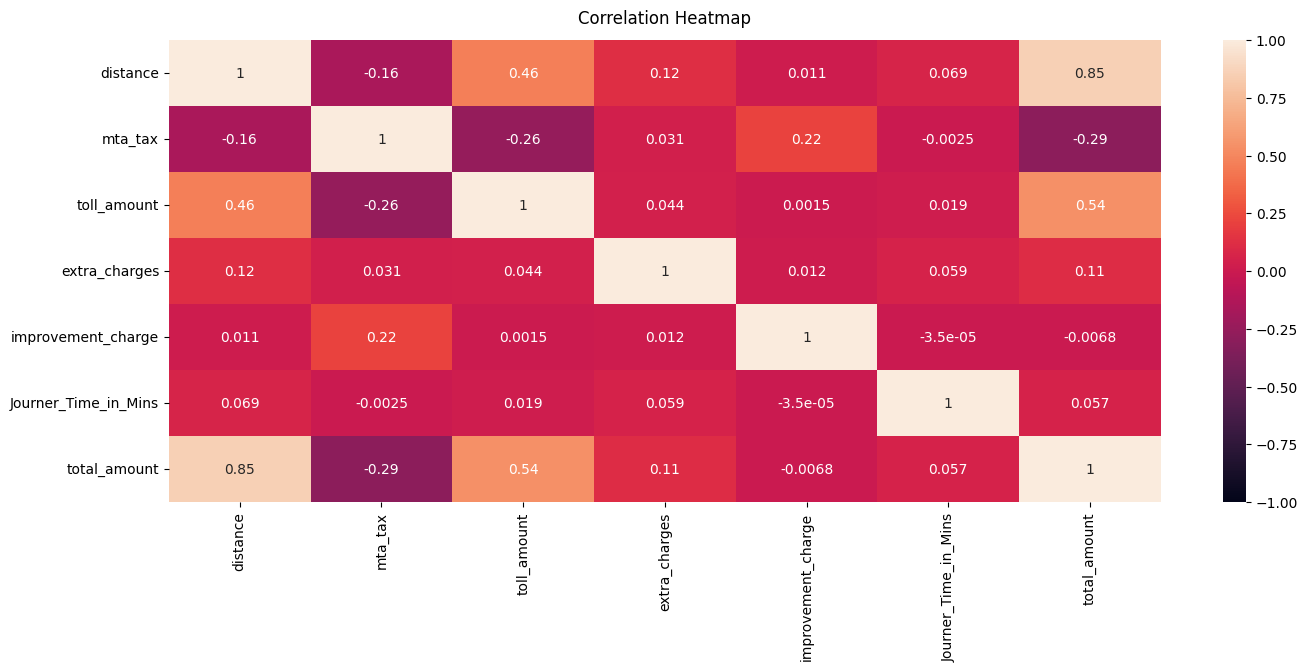

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_selec.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
 

Choosing Regression Model for Prediction as the journey amount are linearly related to selected features.

Spliting into Train and Validation Dataset

In [11]:
from sklearn.model_selection import train_test_split

df_selec = df_selec.dropna()

df_selec_y = df_selec['total_amount']
df_selec_x = df_selec.loc[:,['distance','mta_tax','toll_amount','extra_charges','improvement_charge','Journer_Time_in_Mins']]

x_train, x_val, y_train, y_val = train_test_split(df_selec_x, df_selec_y)

Training the model on Simple Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression


df_linear_y = y_train
df_linear_x = x_train


linear_reg = LinearRegression()
linear_reg.fit(df_linear_x,df_linear_y)

LinearRegression()

Predicting the result for Validation Dataset to determine Model Metrics

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_acc = linear_reg.predict(x_val)

print("Coefficients: \n", linear_reg.coef_)
print("Root Mean squared error: %.2f" % mean_squared_error(y_val, y_acc,squared=False))
print("Coefficient of determination: %.2f" % r2_score(y_val, y_acc))


Coefficients: 
 [ 3.06846028e+00 -5.81999251e+01  1.12255334e+00  5.88031860e-01
  4.41724711e+01  1.21117883e-04]
Root Mean squared error: 5.76
Coefficient of determination: 0.84


Using Ridge Linear Model

In [14]:
from sklearn.linear_model import Ridge


ridge_reg = Ridge()
ridge_reg.fit(df_linear_x,df_linear_y)

y_acc = ridge_reg.predict(x_val)

print("Coefficients: \n", ridge_reg.coef_)
print("Root Mean squared error: %.2f" % mean_squared_error(y_val, y_acc,squared=False))
print("Coefficient of determination: %.2f" % r2_score(y_val, y_acc))

Coefficients: 
 [ 3.06858056e+00 -5.80606215e+01  1.12306454e+00  5.87785311e-01
  4.17396321e+01  1.20957164e-04]
Root Mean squared error: 5.76
Coefficient of determination: 0.84


Lasso Model

In [15]:
from sklearn.linear_model import Lasso


lasso_reg = Lasso()
lasso_reg.fit(df_linear_x,df_linear_y)

y_acc = lasso_reg.predict(x_val)

print("Coefficients: \n", lasso_reg.coef_)
print("Root Mean squared error: %.2f" % mean_squared_error(y_val, y_acc,squared=False))
print("Coefficient of determination: %.2f" % r2_score(y_val, y_acc))

Coefficients: 
 [ 3.09174089e+00 -0.00000000e+00  1.13971592e+00  0.00000000e+00
 -0.00000000e+00  1.76047048e-04]
Root Mean squared error: 6.03
Coefficient of determination: 0.82


ElasticNet Model

In [16]:
from sklearn.linear_model import ElasticNet


elasticnet_reg = ElasticNet()
elasticnet_reg.fit(df_linear_x,df_linear_y)

y_acc = elasticnet_reg.predict(x_val)

print("Coefficients: \n", elasticnet_reg.coef_)
print("Root Mean squared error: %.2f" % mean_squared_error(y_val, y_acc,squared=False))
print("Coefficient of determination: %.2f" % r2_score(y_val, y_acc))

Coefficients: 
 [ 3.00557071e+00 -0.00000000e+00  1.18857031e+00  0.00000000e+00
 -0.00000000e+00  3.12289654e-04]
Root Mean squared error: 6.04
Coefficient of determination: 0.82


LassoLars Regression

In [17]:
from sklearn.linear_model import LassoLars


LassoLars_reg = LassoLars()
LassoLars_reg.fit(df_linear_x,df_linear_y)

y_acc = LassoLars_reg.predict(x_val)

print("Coefficients: \n", LassoLars_reg.coef_)
print("Root Mean squared error: %.2f" % mean_squared_error(y_val, y_acc,squared=False))
print("Coefficient of determination: %.2f" % r2_score(y_val, y_acc))

Coefficients: 
 [3.09170798e+00 0.00000000e+00 1.13974227e+00 0.00000000e+00
 0.00000000e+00 1.76090228e-04]
Root Mean squared error: 6.03
Coefficient of determination: 0.82


TweedieRegressor Model

In [18]:
from sklearn.linear_model import TweedieRegressor


TweedieRegressor_reg = TweedieRegressor()
TweedieRegressor_reg.fit(df_linear_x,df_linear_y)

y_acc = TweedieRegressor_reg.predict(x_val)

print("Coefficients: \n", TweedieRegressor_reg.coef_)
print("Root Mean squared error: %.2f" % mean_squared_error(y_val, y_acc,squared=False))
print("Coefficient of determination: %.2f" % r2_score(y_val, y_acc))

Coefficients: 
 [ 2.92745662e+00 -7.23312981e-02  1.22219060e+00  1.06537619e-01
 -9.64774709e-04  4.21608313e-04]
Root Mean squared error: 6.07
Coefficient of determination: 0.82


Polynomial Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(df_linear_x)

model = LinearRegression()
model.fit(x_poly, df_linear_y)

x_poly = polynomial_features.fit_transform(x_val)
y_acc = model.predict(x_poly)

print("Coefficients: \n", model.coef_)
print("Root Mean squared error: %.2f" % mean_squared_error(y_val, y_acc,squared=False))
print("Coefficient of determination: %.2f" % r2_score(y_val, y_acc))

Coefficients: 
 [-1.24970129e-07 -1.26214829e+01  3.95255990e+01 -2.09693509e+01
 -6.78355507e+01  8.55013541e+01 -4.55124979e-02  6.27215949e-01
 -2.83162747e+01 -5.36976194e+00  7.87281232e-01  4.89989841e+01
  1.20189988e-01  1.97627996e+01  2.74118679e+00  1.00279997e+02
 -3.36070545e+02 -4.39055435e-02  1.91992714e+00  3.68725809e-01
  6.76431907e+01  1.10426705e+00  4.32391943e+01 -2.03506652e+01
  8.48670794e-03  2.56504063e+01  1.47067840e-01  4.82382555e-05
  2.89878629e-04  2.97321646e-02  2.11179351e-03  1.28143134e-03
 -2.24960143e+00  1.74180676e-05 -1.41581374e+01 -1.48248474e-01
 -9.30832344e-01  1.18620820e+02 -1.46574539e-03  3.06560168e-04
  2.65523400e-02  1.76431407e+01 -3.95229516e-05 -2.45841732e-01
  2.36184374e-01  2.16407354e-04  1.46996952e+01 -3.99423387e-01
 -1.84948590e-08  9.88139980e+00  1.37059339e+00  5.01399987e+01
 -1.68035273e+02 -2.19527748e-02 -3.38370122e-03 -2.86086724e+00
  8.22356036e-01 -6.14727501e-05 -7.70122518e+01  3.00839992e+01
 -1.54597

Choosing Polynomial Regression model as it yeils minimum RMSE and max R^2 

predicting values for testing dataset

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


polynomial_features= PolynomialFeatures(degree=3)


df_selec_test = df_selec_test.dropna()

x_poly = polynomial_features.fit_transform(df_selec_test)
y_acc = model.predict(x_poly)

df_test_sm = df_selec_test
df_test_sm['total_amount'] = y_acc

df_test_sm


,distance,mta_tax,toll_amount,extra_charges,improvement_charge,Journer_Time_in_Mins,total_amount
0,0.70,0.5,0.0,0.5,0.3,4.283333,7.147941
1,1.00,0.5,0.0,0.0,0.3,18.550000,9.884758
2,3.35,0.5,0.0,0.0,0.3,14.866667,17.717228
3,0.80,0.5,0.0,0.0,0.3,5.783333,9.026696
4,0.70,0.5,0.0,0.0,0.3,6.883333,8.696779
...,...,...,...,...,...,...,...
154230,1.47,0.5,0.0,1.0,0.3,16.000000,12.093641
154231,1.10,0.5,0.0,0.0,0.3,7.000000,10.072715
154232,1.26,0.5,0.0,1.0,0.3,4.750000,11.164198
154233,2.20,0.5,0.0,0.0,0.3,13.366667,13.882727


In conclusion, this machine learning notebook has provided a comprehensive exploration of feature selection and model evaluation, ultimately leading to the selection of a polynomial regression model as the most suitable choice for the given dataset.

Throughout this analysis, we started by meticulously assessing various feature selection techniques to enhance the model's performance and mitigate overfitting. We then employed multiple linear regression models to predict the target variable, systematically evaluating their accuracy and performance.

The critical evaluation of model performance, particularly the examination of RMSE (Root Mean Square Error) and R-squared (R^2), revealed that the polynomial regression model consistently outperformed other linear models. This was evidenced by its ability to minimize RMSE, indicating lower prediction errors, and maximize R^2, demonstrating a superior fit to the data.